   # TP de Méthodes Numériques : 
   # simulation de modèles proies-prédateurs

## 1. Introduction

On souhaite décrire l'évolution de deux populations en interaction: une population de proies
(par exemple des lièvres)
et une population de prédateurs (par exemple des lynx).  On note respectivement $x(t)$ et $y(t)$ les effectifs des
proies et prédateurs 
(normalisés par des valeurs de référence) à l'instant $t$.
On peut modéliser l'évolution de ces populations
à l'aide d'équations différentielles de la forme:
\begin{equation}
\left\{
\begin{array}{lll}
x'(t)&=& x(t) \, f(x(t),y(t),t) \\
y'(t) &=& y(t) \, g(x(t),y(t),t)
\end{array}
\right.
\end{equation}
où $f,g$ sont des fonctions $C^1$ qui décrivent les taux de croissance de chaque population.
La fonction $y\mapsto f(x,y,t)$ est décroissante (terme de prédation) et
$x\mapsto g(x,y,t)$ est croissante.
Par ailleurs, on suppose les fonctions 
$x\mapsto f(x,y,t)$ et $y\mapsto g(x,y,t)$ décroissantes
si on veut prendre en compte une quantité limitée de nourriture.
La dépendance de $f,g$ par rapport au temps permet
de tenir compte des variations saisonnières
de la quantité de nourriture et des taux de natalité.

## 2. Equation de Lotka-Volterra

Il s'agit d'une version très simplifiée du modèle précédent, dans laquelle 
la population de proies dispose de ressources illimitées et 
l'équation différentielle est autonome, i.e. les fonctions $f,g$ ne
dépendent pas de $t$: 
\begin{equation}
\left\{
\begin{array}{lll}
x'(t)&=& x(t) ( 1- y(t) ) \\
y'(t) &=& \alpha\, y(t)(x(t)  - 1).
\end{array}
\right.
\end{equation}
Le paramètre $\alpha$ est strictement positif.
Pour les calculs numériques, on fixera $\alpha =1$.

### 2.1. Analyse du modèle

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm

In [15]:
def deriv_x_y(x, y, alpha=1):
    xdot = x * (1 - y)
    ydot = alpha * y * (x - 1)
    return xdot, ydot

def test_n_episodes(x_0, y_0, alpha=1, n=1000, verbose=True):
    t = 0
    x = x_0
    y = y_0

    while t < n:
        if t % 1 == 0 and verbose:
            print(f"Episode {t}\t x = {x}, y = {y}")
        
        t += 1
        xdot, ydot = deriv_x_y(x, y, alpha)
        
        if (xdot, ydot) == (0, 0):
            if verbose:
                print(f"Fin de la simulation après {t} episodes. (xdot = {xdot}, ydot = {ydot}) => Point d'équilibre")
                print(f"\nRESULAT:\nx = {x}\ny = {y}")
            return True
        
        x += xdot
        y += ydot
        
        if x > 10**10:
            if verbose:
                print(f"Fin de la simulation après {t} episodes. (x = +inf)")
            break
        if x < 0:
            if verbose:
                print(f"Fin de la simulation après {t} episodes. (x < 0)")
            break
        if y > 10**10:
            if verbose:
                print(f"Fin de la simulation après {t} episodes. (y = +inf)")
            break
        if y < 0:
            if verbose:
                print(f"Fin de la simulation après {t} episodes. (y < 0)")
            break

    if verbose:
        print(f"\nRESULAT:\nx = {x}\ny = {y}")
    return True if t == n else False

def test_condition_initiale(x_0, y_0, alpha, n=1000, verbose=True):
    if test_n_episodes(x_0, y_0, alpha, n, verbose):
        if verbose:
            print("Nous avons trouvé une solution d'équilibre!")
        return True
    else:
        if verbose:
            print("Ces conditions initiales ne donnent pas une solution d'équilibre!")
        return False

def trouver_conditions_initiales(alpha ,x_0=1000, n=1000):
    for y_0 in tqdm(np.linspace(0, 10000, 10000000)):
        if test_condition_initiale(x_0, y_0, alpha, n, verbose=False):
            return y_0
    return -1
alpha = 1

In [35]:
def schema_num(x_0, y_0, alpha, n, h):
    """ Fonction qui reprend test_n_episodes mais pour un affichage dynamique """
    t = 0
    x = x_0
    y = y_0
    timesteps_x = [x_0]
    timesteps_y = [y_0]
    time = [0]
    
    while t < n:
        t += h

        xdot, ydot = deriv_x_y(x, y, alpha)
        if (xdot, ydot) == (0, 0):
            break
        
        x += h * xdot
        y += h * ydot
        #print(t,x,y)
        if  x < 0 or y < 0: # or x >= 1 or y >= 1:
            print(f"Endend with negative value: x = {x:0.2f}, y = {y:0.2f}")
            break
        
        time.append(t)
        timesteps_x.append(x)
        timesteps_y.append(y)
    

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 8, forward=True)    
    #plt.xlim(xmin=0,xmax=(len(time)-1) * pas)
    
    ax1.plot(timesteps_x, timesteps_y, label='lynx/lievre',c="r")
    #plt.plot(time, timesteps_y, label='lynx')
    ax1.set_title("Lynx/Lièvres" ,fontsize=16)
    ax1.legend()
    
    
    ax2.plot(time, timesteps_x, label='lièvres')
    ax2.plot(time, timesteps_y, label='lynx')
    ax2.set_title("Lynx et Lièvres / temps" ,fontsize=16)
    ax2.legend()
    plt.show()

#### Question 1 
Calculer la solution $(x(t),y(t))$ pour la condition initiale
$(x(0),y(0))=(0,y_0)$ avec $y_0 \geq 0$. Quel est son comportement quand $t \rightarrow +\infty$ ?
Interpréter ce résultat.

In [36]:
widgets.interact(schema_num, 
                 x_0=widgets.fixed(0), 
                 y_0=widgets.IntSlider(value=1,min=0,max=1,step=0.01), 
                 alpha=widgets.FloatSlider(value=1,min=0,max=1,step=0.01),
                 n=widgets.IntSlider(value=200,min=10,max=1000,step=10),
                 h=widgets.FloatSlider(value=0.1,min=0.001,max=1,step=0.001));

interactive(children=(IntSlider(value=1, description='y_0', max=1, step=0), FloatSlider(value=1.0, description…

#### _Réponse Question 1_ 
Pour la condition initiale $(x(0),y(0))=(0 ,y_0)$ avec $y_0 \geq 0$, nous obtenons la solution: $(x(t), y(t)) \rightarrow(0, 0)$ lorsque $t \rightarrow +\infty$.

Ceci s'explique car les proies, qui commencent à 0, ne peuvent pas se reproduire (ils ne vont pas apparaitre de nulle part), et les prédateurs n'ont rien à manger, et que leur population décroit donc (la vitesse à laquelle elle décroit dépend de $\alpha$).

#### Question 2 
Mêmes questions pour la condition initiale $(x(0),y(0))=(x_0 ,0)$ avec $x_0 \geq 0$. 

In [37]:
widgets.interact(schema_num, 
                 x_0=widgets.FloatSlider(value=1,min=0,max=1,step=0.01), 
                 y_0=widgets.fixed(0), 
                 alpha=widgets.FloatSlider(value=1,min=0,max=1,step=0.01),
                 n=widgets.IntSlider(value=200,min=10,max=1000,step=10),
                 h=widgets.FloatSlider(value=0.1,min=0.001,max=1,step=0.001));

interactive(children=(FloatSlider(value=1.0, description='x_0', max=1.0, step=0.01), FloatSlider(value=1.0, de…

#### _Réponse Question 2_
Pour la condition initiale $(x(0),y(0))=(x_0, 0)$ avec $x_0 \geq 0$, nous obtenons la solution: $(x(t), y(t)) \rightarrow(+\infty, 0)$ lorsque $t \rightarrow +\infty$.

Ceci s'explique car les proies, qui ne sont pas chassées peuvent se reproduire, et les prédateurs ne peuvent pas augmenter leur population, car celle ce commence à 0.

#### Question 3
Déterminer les solutions d'équilibre, i.e. les solutions $(x,y)$ indépendantes de $t$.

In [38]:
widgets.interact(schema_num, 
                 x_0=widgets.FloatSlider(value=1.001,min=0,max=5,step=0.01), 
                 y_0=widgets.FloatSlider(value=1,min=0,max=5,step=0.01),
                 alpha=widgets.FloatSlider(value=1,min=0,max=1,step=0.01),
                 n=widgets.IntSlider(value=200,min=10,max=1000,step=10),
                 h=widgets.FloatSlider(value=1,min=0.001,max=1,step=0.001)); 

interactive(children=(FloatSlider(value=1.001, description='x_0', max=5.0, step=0.01), FloatSlider(value=1.0, …

#### _Réponse Question 3_
Peu importe les $x_0, y_0$ de départ nous obtenons un shéma légèrement divergent.\
Cependant, il semblerait que nous obtenons des solutions d'équilibre plus $(x_0 = y_0) \rightarrow (1, 1)$.\
Pour effectuer cette estimations, nous avons diminué le pas, en le faisant tendre vers 0.

#### Question 4
Une fonction $H\, : \, ]0,+\infty[ \times ]0,+\infty[ \rightarrow \mathbb{R}$
est appelée intégrale première de l'équation différentielle
lorsque pour toute solution $(x(t),y(t))$ on a $\frac{d}{dt} H(x(t),y(t))=0$.
Vérifier que 
$$
H(x,y)=\alpha\, (x-\ln{x})+y-\ln{y}
$$
est une intégrale première.

#### _Réponse Question 4_
D'apès l'énoncé, nous avons:
$$
H(x,y)=\alpha\, (x-\ln{x})+y-\ln{y}
$$
D'où :
\begin{align*}
\frac{d}{dt} H(x(t),y(t))= \,& \alpha\, (x'(t)-\frac{x'(t)}{x(t)})+y'(t)-\frac{y'(t)}{y(t)}\\
                         = \,& \alpha\, (x(t)(1 - y(t)) - \frac{x(t)(1-y(t)}{x(t)})+\alpha\, y(t)(x(t) - 1)-\frac{\alpha\,                                y(t)(x(t) - 1)}{y(t)}\\
                         = \,&\alpha\, (x(t)(1 - y(t)) - (1-y(t))+\alpha\, y(t)(x(t) - 1)-\alpha\,(x(t) - 1)\\
                         = \,&\alpha\, (x(t) - x(t)y(t) - 1 + y(t) + y(t)x(t) - y(t) - x(t) + 1)\\
                         = \,&0
\end{align*}

#### Question 5
Tracer différentes courbes de niveau 
$H(x,y)=\mbox{constante}$ (matplotlib.pyplot.contour)
ainsi que la direction du champ de vecteurs $F(x,y)=(\, x ( 1- y )\, ,\, \alpha\, y(x  - 1)\, )$ 
du système (matplotlib.pyplot.quiver) pour $\alpha =1$.

In [20]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

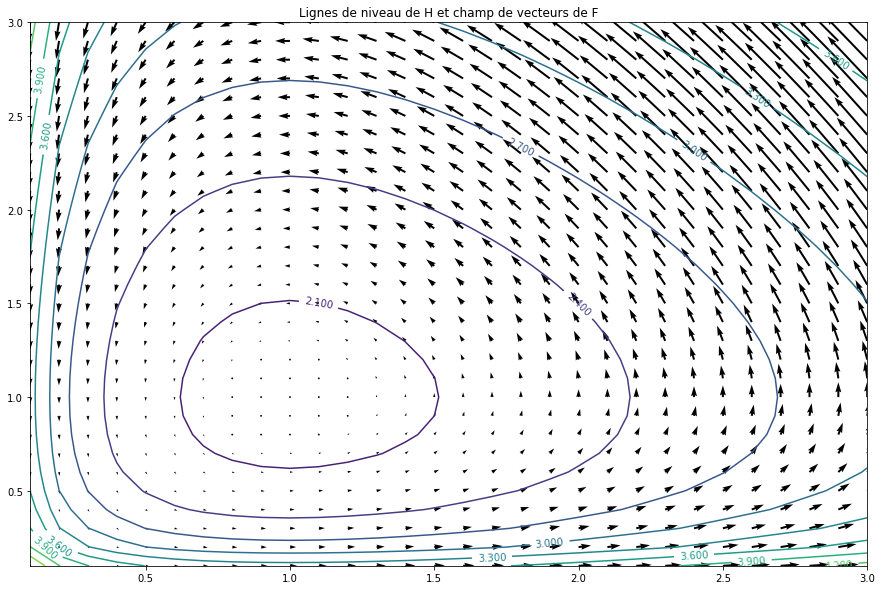

In [39]:
alpha = 1
size = 30
max = 3
x = np.linspace(0.1, max, size)
y = np.linspace(0.1, max, size)
X, Y = np.meshgrid(x, y)
H = alpha*(X - np.log(X)) + Y - np.log(Y)

fig, ax = plt.subplots(figsize = (15, 10))
CS = ax.contour(X, Y, H, levels = 10)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title("Lignes de niveau de H et champ de vecteurs de F")
        
x = []
for _ in range(size):
    x = np.append(x, np.linspace(0.1, max, size))
y = []
for index in range(size):
    y = np.append(y, np.full(size, x[index]))

x_dir = np.zeros(size**2)
y_dir = np.zeros(size**2)
for i in range(size**2):
    x_val, y_val = x[i], y[i]
    x_dir[i] = x_val*(1-y_val)
    y_dir[i] = alpha*y_val*(x_val-1)
       
plt.quiver(x, y, x_dir, y_dir);


#### Question 6
Quand on considère 
des solutions $(x(t),y(t))$
de conditions initiales $(x(0),y(0))$ strictement positives,
que peut-on en déduire pour les trajectoires
$\gamma = \{ (x(t),y(t)),\, t \in \mathbb{R} \} \subset {\left(\mathbb{R}^+ \right)}^2 $
ainsi que pour les fonctions $t \mapsto (x(t),y(t))$ ?

#### _Réponse Question 6_
Le tracé précédent nous montre que pour toute paire $(x_0,y_0) > (0, 0)$, les trajectoires $\gamma$ sont cycliques, et tournent autour du point $(1,1)$.
Les fonctions $t \mapsto (x(t),y(t))$ sont cycliques mais divergentes.

### 2.2. Intégration Numérique

#### 2.2.1. Schéma d'Euler explicite
Afin d'approcher numériquement les solutions du modèle de Lotka-Volterra
pour $t \in [0,t_{\mathrm{max}}]$, 
on discrétise l'équation à l'aide du schéma d'Euler explicite:
\begin{equation}
\left\{
\begin{array}{lll}
x_{k+1}&=& x_k + h\, x_k ( 1- y_k ) \\
y_{k+1} &=& y_k + h\, y_k (x_k  - 1)
\end{array}
\right.
\end{equation}
où $h >0$ est le pas d'intégration en temps et
$(x_k,y_k)$ une approximation de $(x(t_k),y (t_k))$ en $t_k = k\, h$.
On fixe $h=t_{\mathrm{max}}/N$ où $N$ est un entier $\geq 1$.

#### Question 7
Pour $t_{\mathrm{max}}=120$, $(x(0),y(0))=(2,1)$ 
et différentes valeurs du pas de temps $h$, 
tracer les trajectoires 
$(x_k,y_k)_{0 \leq k \leq N} \subset {\left(\mathbb{R}^+ \right)}^2$
ainsi que les graphes de $x_k$, $y_k$ en fonction de $t_k$. 
Qu'observez-vous ? Comparer ces résultats à l'étude théorique 
de la question 6.

In [40]:
widgets.interact(schema_num, 
                 x_0=widgets.FloatSlider(value=2,min=0,max=5,step=0.01), 
                 y_0=widgets.FloatSlider(value=1,min=0,max=5,step=0.01),
                 alpha=widgets.FloatSlider(value=1,min=0,max=1,step=0.01),
                 n=widgets.IntSlider(value=200,min=10,max=1000,step=10),
                 h=widgets.FloatSlider(value=0.001,min=0.001,max=1,step=0.001)); 

interactive(children=(FloatSlider(value=2.0, description='x_0', max=5.0, step=0.01), FloatSlider(value=1.0, de…

#### _Réponse Question 7_
En faisant vaier h, nous pouvons remarquer que plus il tend vers 0, plus le schéma devient periodique.

#### 2.2.2. Schéma d'Euler implicite
On considère maintenant le schéma d'Euler implicite
\begin{equation}
\left\{
\begin{array}{lll}
x_{k+1}-x_k&=&   h\, x_{k+1} ( 1- y_{k+1} ) \\
y_{k+1}-y_k &=&   h\, y_{k+1} (x_{k+1}  - 1)
\end{array}
\right.
\end{equation}

#### Question 8
Exprimer $x_{k+1}$ en fonction de $x_k$, $y_{k+1}$ et $h$,
puis calculer $y_{k+1}$ en fonction de $(x_k,y_{k},h)$
en résolvant une équation du second degré.

Remarque: lorsque $h=0$ on doit obtenir $(x_{k+1},y_{k+1})=(x_{k},y_{k})$.

#### _Réponse Question 8_
Nous avons: \begin{array}{lll}
x_{k+1}-x_k&=&   h\, x_{k+1} ( 1- y_{k+1} ) \\
y_{k+1}-y_k &=&   h\, y_{k+1} (x_{k+1}  - 1)
\end{array}

D'où, pour x: 
\begin{align*}
x_{k+1} =& \, h x_{k+1}(1-y_{k+1}) + x_k \\
x_{k+1}(1 - h (1-y_{k+1})) = & \, x_k \\
x_{k+1} = & \, \frac{x_k}{(1 + h (y_{k+1} - 1)}\\
\end{align*}

Et pour y:
\begin{align*}
y_{k+1} =& \, h y_{k+1}(x_{k+1} - 1) + y_k \\
y_{k+1}(1 - h (x_{k+1} - 1)) =& \, y_k \\
y_{k+1}(1 + h (1 - \frac{x_k}{1 + h (y_{k+1} - 1)})) =& \, y_k \\
y_{k+1}(1 + h - h \frac{x_k}{1 - h  + h y_{k+1}}) =& \, y_k \\
y_{k+1}((1 + h)(1 - h  + h y_{k+1}) - h x_k) =& \, (1 - h  + h y_{k+1})y_k \\
y_{k+1}(1 - h  + h y_{k+1} + h - h²  + h² y_{k+1} - h x_k) =& \, (1 - h)y_k  + h y_{k+1} y_k \\
y_{k+1}(1 + h y_{k+1} - h²  + h² y_{k+1} - h x_k) =& \, (1 - h)y_k  + h y_{k+1} y_k \\
y_{k+1} + h y_{k+1}² - h²y_{k+1}  + h² y_{k+1}² - h x_ky_{k+1} + (h - 1)y_k  - h y_{k+1} y_k=& \, 0  \\
(h² + h)y_{k+1}² + (1-h x_k - h y_k -h² )y_{k+1} + (h-1)y_k=& \, 0  \\
\end{align*}
\
Soit: $A = h² + h$, $B= 1 - h x_k - h y_k - h²$, $C = (h-1)y_k$ et $D = \sqrt{B²-4AC}$\
Les solutions sont donc:\begin{array}{lll}
y_1 = \frac{-D-B}{2A} \\
y_2 = \frac{D-B}{2A}
\end{array}
Or $y_k >= 0$, et donc la soltion est $y_2$.
On a donc finalement : $y_{k+1} = \frac{\sqrt{(1 - h x_k - h y_k - h²)²-4(h² + h)(h-1)y_k} - 1 + h x_k + h y_k + h²}{2 (h² + h)}$

#### Question 9
Reprendre la question 7 pour le schéma d'Euler implicite.

In [91]:
from math import sqrt
def schema_num_euler(x_0, y_0, alpha, n, h):
    """ Fonction qui reprend test_n_episodes mais pour un affichage dynamique """
    
    def calc_y(h, x, y):
        #print((sqrt((1 - h*x - h*y - h**2)**2 -4*(h**2 + h)*(h-1)*y) - 1 + h*x + h*y + h**2)/(2*(h**2 + h)))
        return (sqrt((1 - h*x - h*y - h**2)**2 -4*(h**2 + h)*(h-1)*y) - 1 + h*x + h*y + h**2)/(2*(h**2 + h))
    def calc_x(h, x, y_new):
        return x/(1 + h*(y_new - 1))
    
    t = 0
    x = x_0
    y = y_0
    timesteps_x = [x_0]
    timesteps_y = [y_0]
    time = [0]
    
    while t < n:
        t += h
        
        y = calc_y(h, x, y)      
        x = calc_x(h, x, y)
        
        if  x < 0 or y < 0:
            print(f"Endend with negative value: x = {x:0.2f}, y = {y:0.2f}; after {int(t/h)} iterations.")
            break
        
        time.append(t)
        timesteps_x.append(x)
        timesteps_y.append(y)
    

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 8, forward=True) 
    
    ax1.plot(timesteps_x, timesteps_y, label='lynx/lievre',c="r")
    ax1.set_title("Lynx/Lièvres" ,fontsize=16)
    ax1.legend()
    
    ax2.plot(time, timesteps_x, label='lièvres')
    ax2.plot(time, timesteps_y, label='lynx')
    ax2.set_title("Lynx et Lièvres / temps" ,fontsize=16)
    ax2.legend()
    plt.show()

In [92]:
widgets.interact(schema_num_euler, 
                 x_0=widgets.FloatSlider(value=2,min=0,max=5,step=0.01), 
                 y_0=widgets.FloatSlider(value=1,min=0,max=5,step=0.01),
                 alpha=widgets.FloatSlider(value=1,min=0,max=1,step=0.01),
                 n=widgets.IntSlider(value=200,min=10,max=1000,step=10),
                 h=widgets.FloatSlider(value=0.001,min=0.001,max=1,step=0.001)); 

interactive(children=(FloatSlider(value=2.0, description='x_0', max=5.0, step=0.01), FloatSlider(value=1.0, de…

#### 2.2.3. Schéma d'Euler semi-implicite
On considère un schéma d'Euler semi-implicite
\begin{equation}
\left\{
\begin{array}{lll}
x_{k+1}-x_k&=&  h\, x_{k} ( 1- y_{k+1} ) \\
y_{k+1} -y_k&=&  h\, y_{k+1} (x_{k}  - 1)
\end{array}
\right.
\end{equation}
dans lequel la variable $x$ est traitée de manière explicite
(évaluée en $t=t_{k}$ dans le second membre de l'équation différentielle)
et $y$ de manière implicite (évaluée en $t=t_{k+1}$).

#### Question 10
Exprimer $(x_{k+1},y_{k+1})$ en fonction de $(x_k,y_{k},h)$.

#### Question 11
Pour $t_{\mathrm{max}}=120$ et différentes valeurs du pas de temps $h$, 
tracer les trajectoires 
$(x_k,y_k)_{0 \leq k \leq N} $
pour différentes conditions initiales $(x(0),y(0))$, 
ainsi que les graphes de $x_k$, $y_k$ en fonction de $t_k$. 
Qu'observez-vous ? Comparer ces résultats à ceux
de la question 6.

## 3. Modèle proies-prédateurs avec croissance limitée
On considère l'équation différentielle:
\begin{equation}
\left\{
\begin{array}{lll}
x'(t)&=& x(t) ( 1- y(t) - c(t)\, x(t)) \\
y'(t) &=&  y(t)(x(t)  - 1)
\end{array}
\right.
\end{equation}
où le coefficient $c(t)>0$ 
tient compte du fait que la population de proies est limitée par la quantité de nourriture.
On suppose que la fonction $c$ est $T$-périodique
(variations saisonnières des ressources) avec $T=12$ (l'unité de temps représente un mois).
Dans ce TP on fixera 
$$
c(t)=\lambda\, \left(1+\frac{1}{2}\, \cos{\left( \frac{\pi}{6}\, t \right)}\right),
$$
où $\lambda >0$ est un paramètre.

On discrétise l'équation différentielle par le
schéma d'Euler semi-implicite
\begin{equation}
\left\{
\begin{array}{lll}
x_{k+1}-x_k&=&  h\, x_{k} ( 1- y_{k+1} - c(t_k)\, x_k) \\
y_{k+1} -y_k&=&  h\, y_{k+1} (x_{k}  - 1)
\end{array}
\right.
\end{equation}

#### Question 12
Exprimer  $(x_{k+1},y_{k+1})$ en fonction de $(t_k,x_k,y_{k},h)$.

#### Question 13
On fixe $t_{\mathrm{max}}=120$ et $h=10^{-3}$.
Pour différentes valeurs du paramètre $\lambda$,
tracer les graphes de $x_k$, $y_k$ en fonction de $t_k$
pour différentes conditions initiales $(x(0),y(0))$. 
Qu'observez-vous ? 
Interpréter le comportement des solutions lorsque
$t\rightarrow +\infty$
en terme d'évolution des populations, ainsi que l'effet du paramètre $\lambda$.